In [31]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/zaid-kamil/2024-JUL-ML-1230-SS/main/datasets/housing.csv')

In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [12]:
df.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

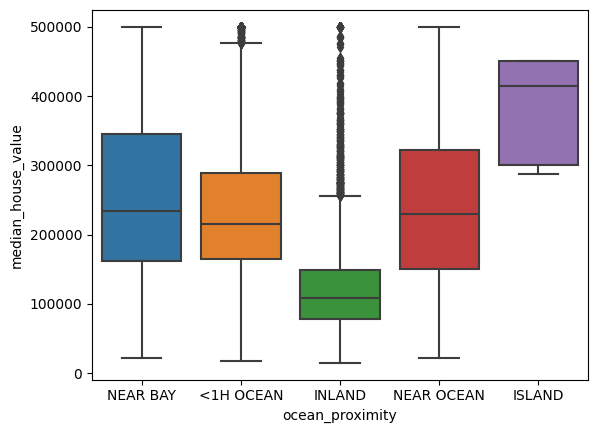

In [20]:
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')


In [22]:
X=df.drop(columns=['median_house_value','ocean_proximity'])
y = df['median_house_value']

In [26]:
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.tree import DecisionTreeRegressor

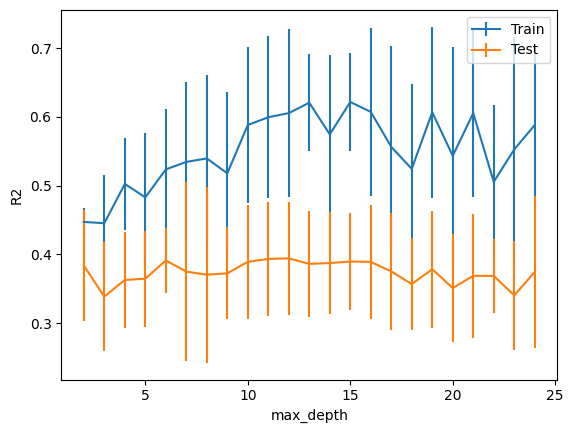

In [27]:
from sklearn.model_selection import ValidationCurveDisplay
max_depths = list(range(2, 25))
disp = ValidationCurveDisplay.from_estimator(
    DecisionTreeRegressor(),
    X,y,
    param_name='max_depth',
    param_range=max_depths,
    scoring='r2',
    n_jobs=-1,
    std_display_style='errorbar'
)

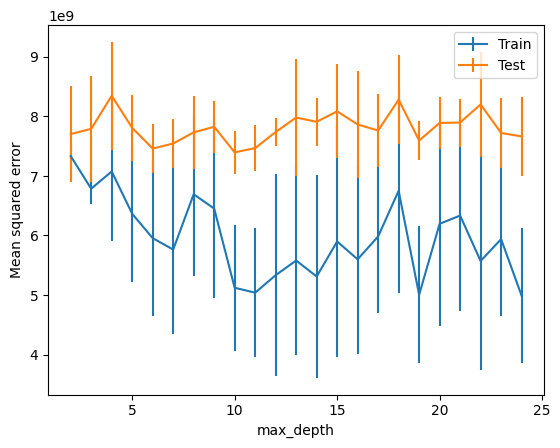

In [29]:
from sklearn.model_selection import ValidationCurveDisplay
max_depths = list(range(2, 25))
disp = ValidationCurveDisplay.from_estimator(
    DecisionTreeRegressor(),
    X,y,
    param_name='max_depth',
    param_range=max_depths,
    scoring='neg_mean_squared_error',
    negate_score=True,
    n_jobs=-1,
    std_display_style='errorbar'
)

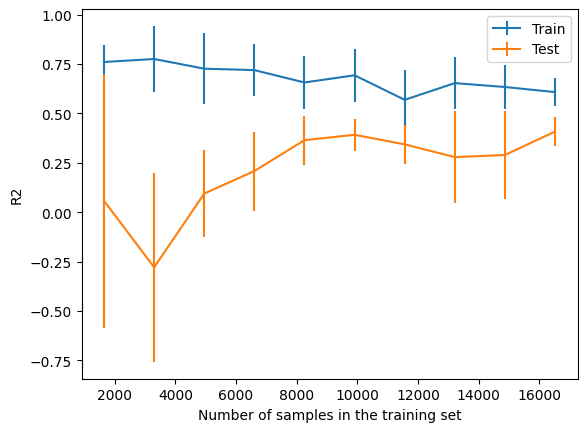

In [32]:
from sklearn.model_selection import LearningCurveDisplay

disp = LearningCurveDisplay.from_estimator(
    DecisionTreeRegressor(max_depth=9),
    X,y,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    std_display_style='errorbar'
)